In [112]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

In [113]:
# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
!pip install koreanize-matplotlib

import koreanize_matplotlib

In [114]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

# Mac 의 한글 폰트 설정
plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)

# 폰트가 선명하게 보이기 위해 - 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 그래프가 노트북 안에 보이게 하기 위해
%matplotlib inline

# 1. 중부지방 교통사고 데이터

In [116]:
# 교통사고 데이터 읽기
event_df = pd.read_excel('./교통사고/서울경기교통사고.xlsx')

# 필요없는거 없애기
event_df = event_df.drop('사고유형', axis=1)
event_df = event_df.drop('노면상태', axis=1)
event_df['사고일시'] = event_df['사고일시'].str[:-3]
event_df

,사고일시,법규위반,기상상태
0,2022년 6월 1일,안전운전불이행,맑음
1,2022년 6월 1일,안전운전불이행,맑음
2,2022년 6월 1일,신호위반,맑음
3,2022년 6월 1일,신호위반,맑음
4,2022년 6월 1일,안전운전불이행,맑음
...,...,...,...
7936,2022년 6월 30일,신호위반,비
7937,2022년 6월 30일,안전운전불이행,맑음
7938,2022년 6월 30일,안전운전불이행,비
7939,2022년 6월 30일,교차로운행방법위반,맑음


In [83]:
event_df['법규위반'].unique()

array(['안전운전불이행', '신호위반', '안전거리미확보', '보행자보호의무위반', '교차로운행방법위반', '차로위반',
       '기타', '불법유턴', '직진우회전진행방해', '중앙선침범'], dtype=object)

In [84]:
event_df['기상상태'].unique()

array(['맑음', '기타', '흐림', '비'], dtype=object)

## 내가 필요한거 -> 중앙선침범, 불법유턴, 차로위반, 신호위반, 중앙선침범

In [117]:
# 필요한 법규 위반 항목만 선택
desired_violations = ['중앙선침범', '불법유턴', '차로위반', '신호위반']
filtered_df = event_df[event_df['법규위반'].isin(desired_violations)]

# 결과 출력
df = filtered_df.reset_index(drop=True)
df

,사고일시,법규위반,기상상태
0,2022년 6월 1일,신호위반,맑음
1,2022년 6월 1일,신호위반,맑음
2,2022년 6월 1일,신호위반,맑음
3,2022년 6월 1일,신호위반,맑음
4,2022년 6월 1일,신호위반,맑음
...,...,...,...
2038,2022년 6월 30일,중앙선침범,비
2039,2022년 6월 30일,신호위반,흐림
2040,2022년 6월 30일,신호위반,맑음
2041,2022년 6월 30일,신호위반,비


In [118]:
# 날짜도 없애기
df = df.drop('사고일시', axis=1)
df

,법규위반,기상상태
0,신호위반,맑음
1,신호위반,맑음
2,신호위반,맑음
3,신호위반,맑음
4,신호위반,맑음
...,...,...
2038,중앙선침범,비
2039,신호위반,흐림
2040,신호위반,맑음
2041,신호위반,비


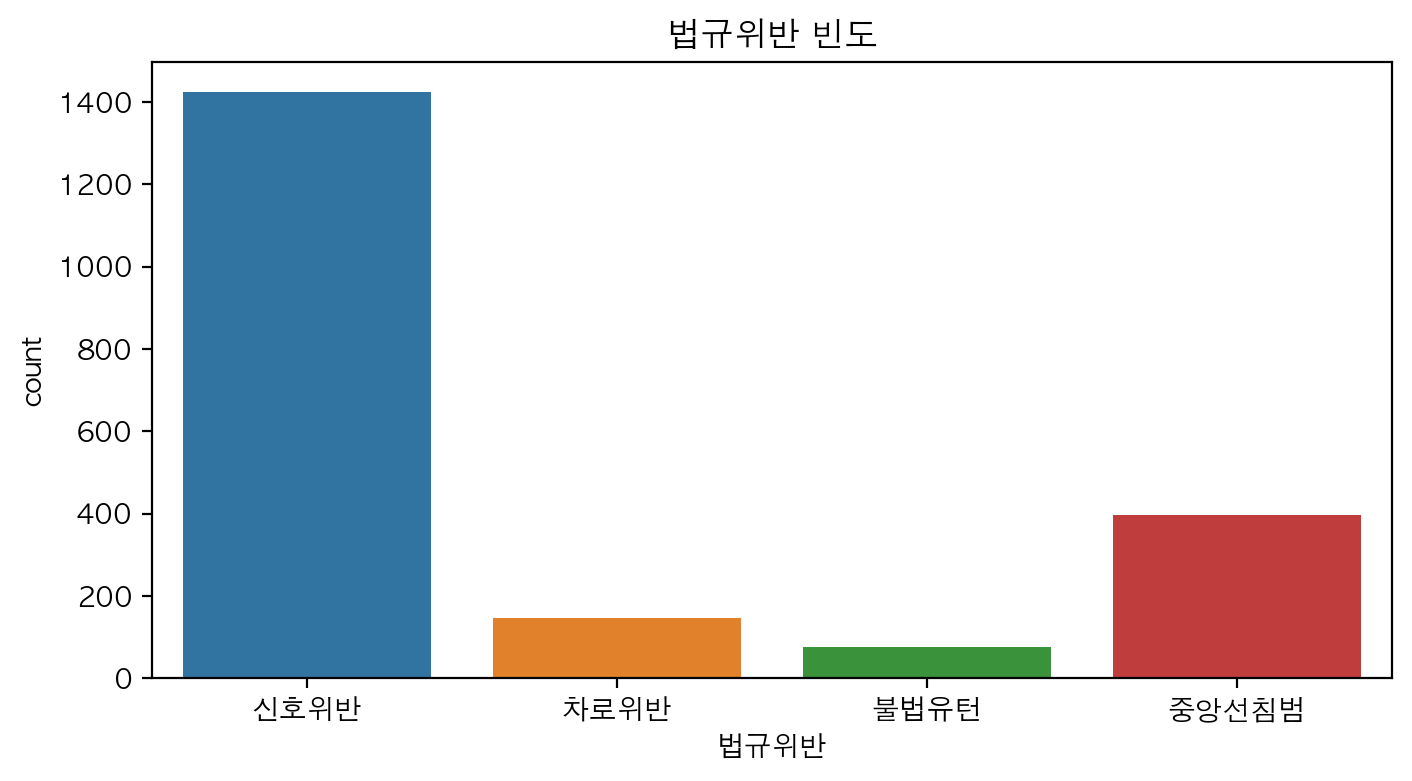

In [119]:
# 1. 막대 그래프 (Bar Chart) - 법규위반
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='법규위반')
plt.title('법규위반 빈도')
plt.show()

법규위반 자체에 대한 빈도수는 다음과 같습니다. 


신호위반이 압도적으로 많고, 그 다음은 중앙선 침범, 차로위반의 순으로 나타납니다

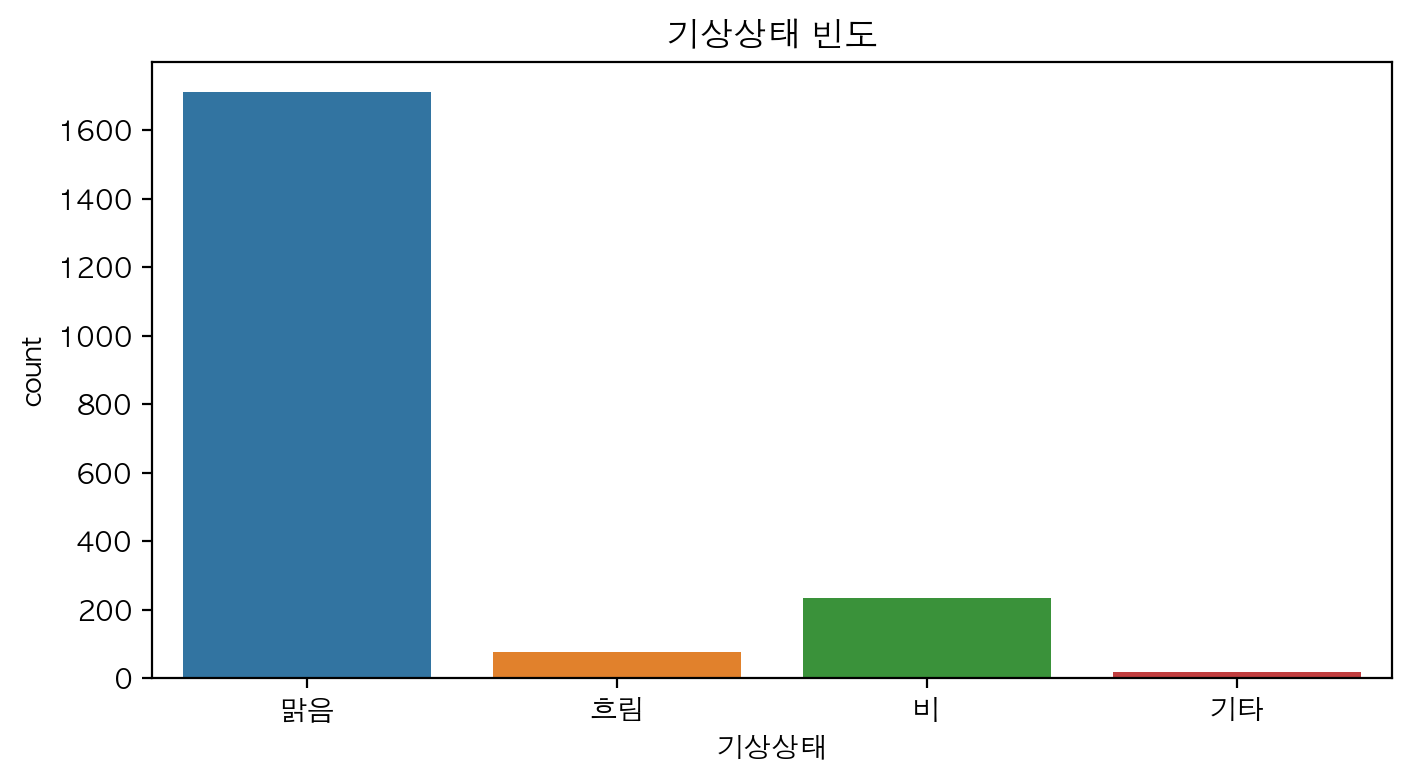

In [120]:
# 2. 막대 그래프 (Bar Chart) - 기상상태
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='기상상태')
plt.title('기상상태 빈도')
plt.show()

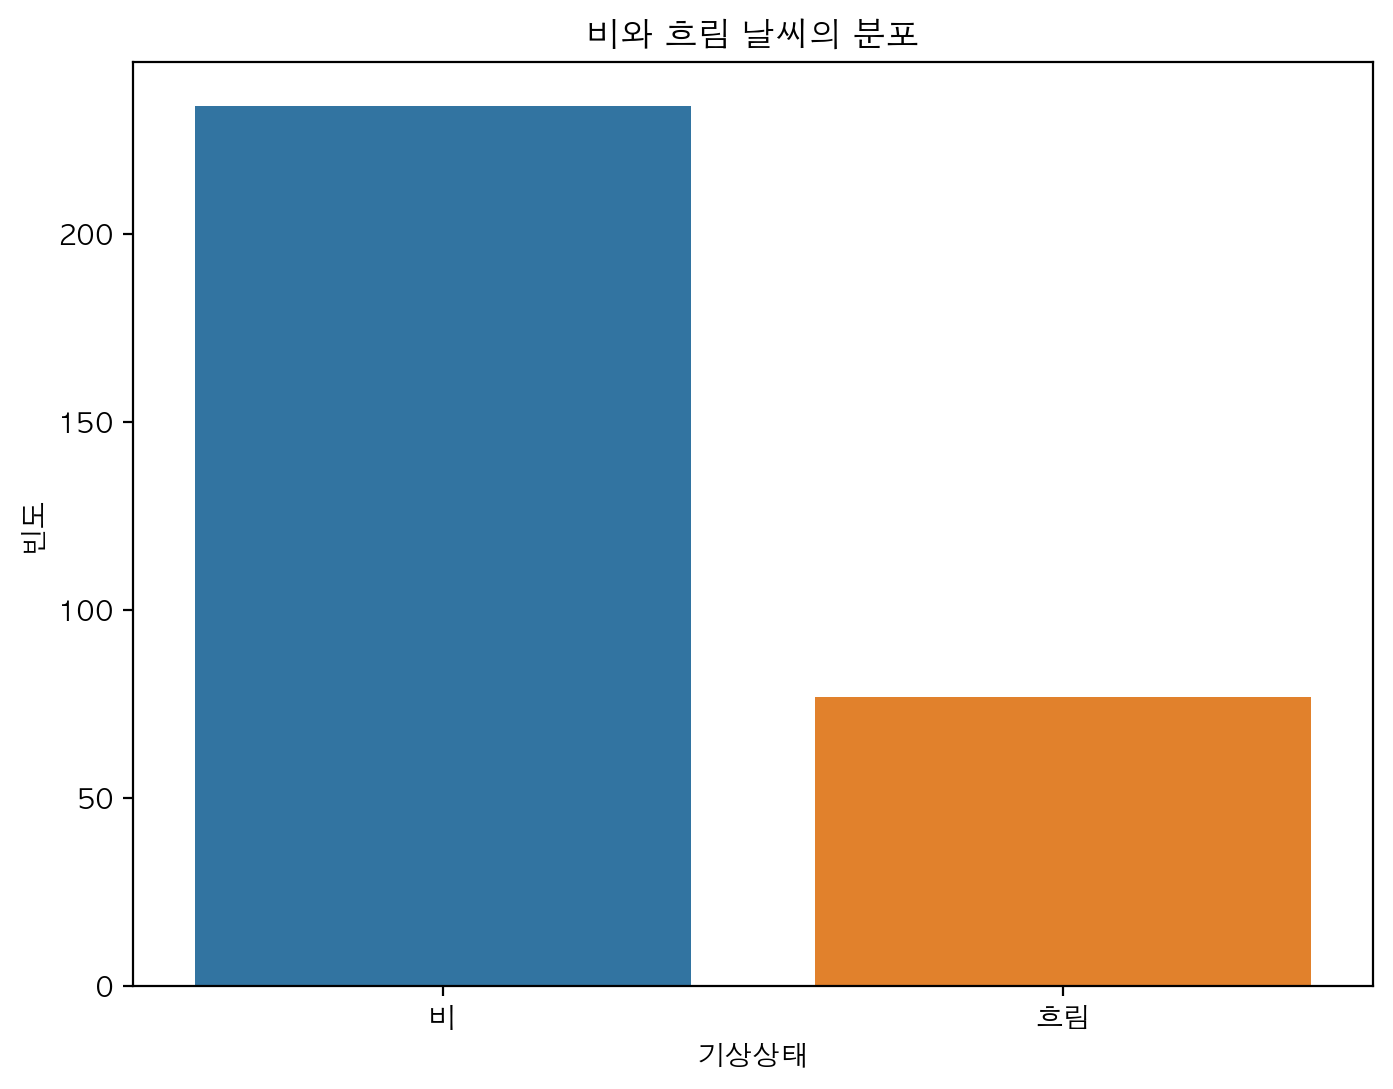

In [122]:
# '기상상태'가 '비' 또는 '흐림'인 경우에 해당하는 데이터 추출
rainy_cloudy_data = df[df['기상상태'].isin(['비', '흐림'])]

# '비'와 '흐림'의 분포를 막대 그래프로 시각화
plt.figure(figsize=(8, 6))
sns.countplot(data=rainy_cloudy_data, x='기상상태', order=['비', '흐림'])
plt.title('비와 흐림 날씨의 분포')
plt.xlabel('기상상태')
plt.ylabel('빈도')
plt.show()

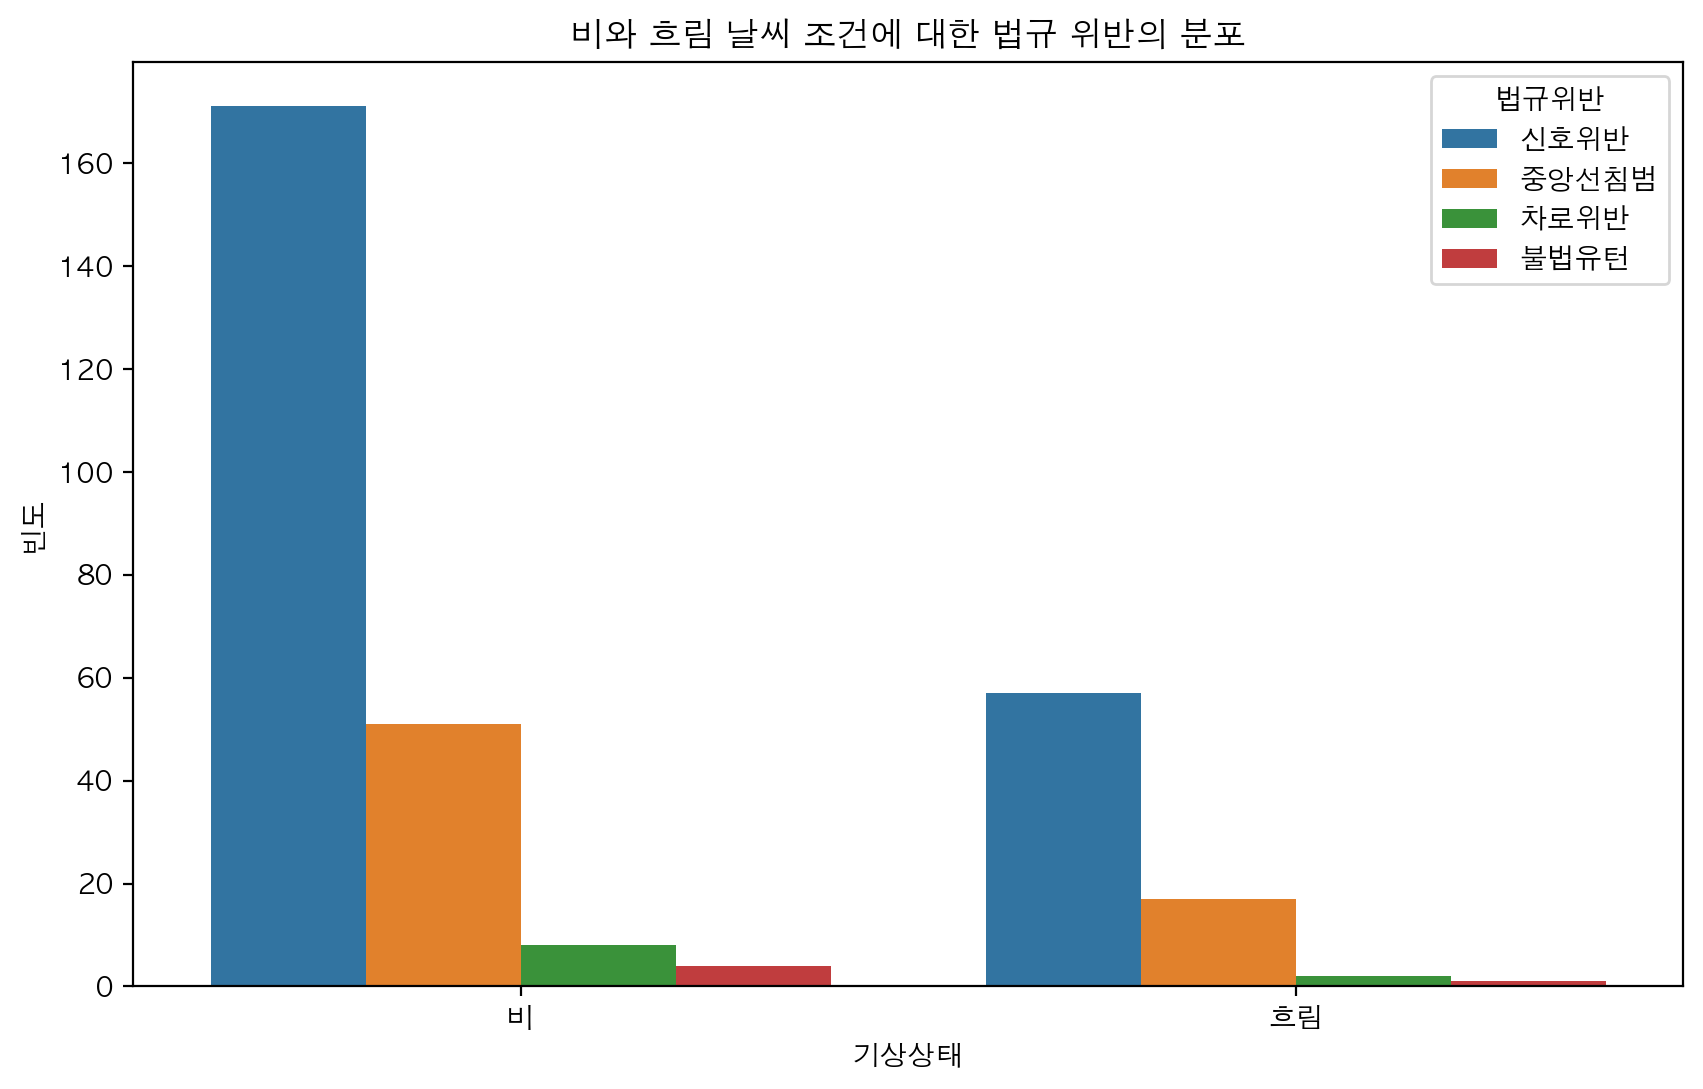

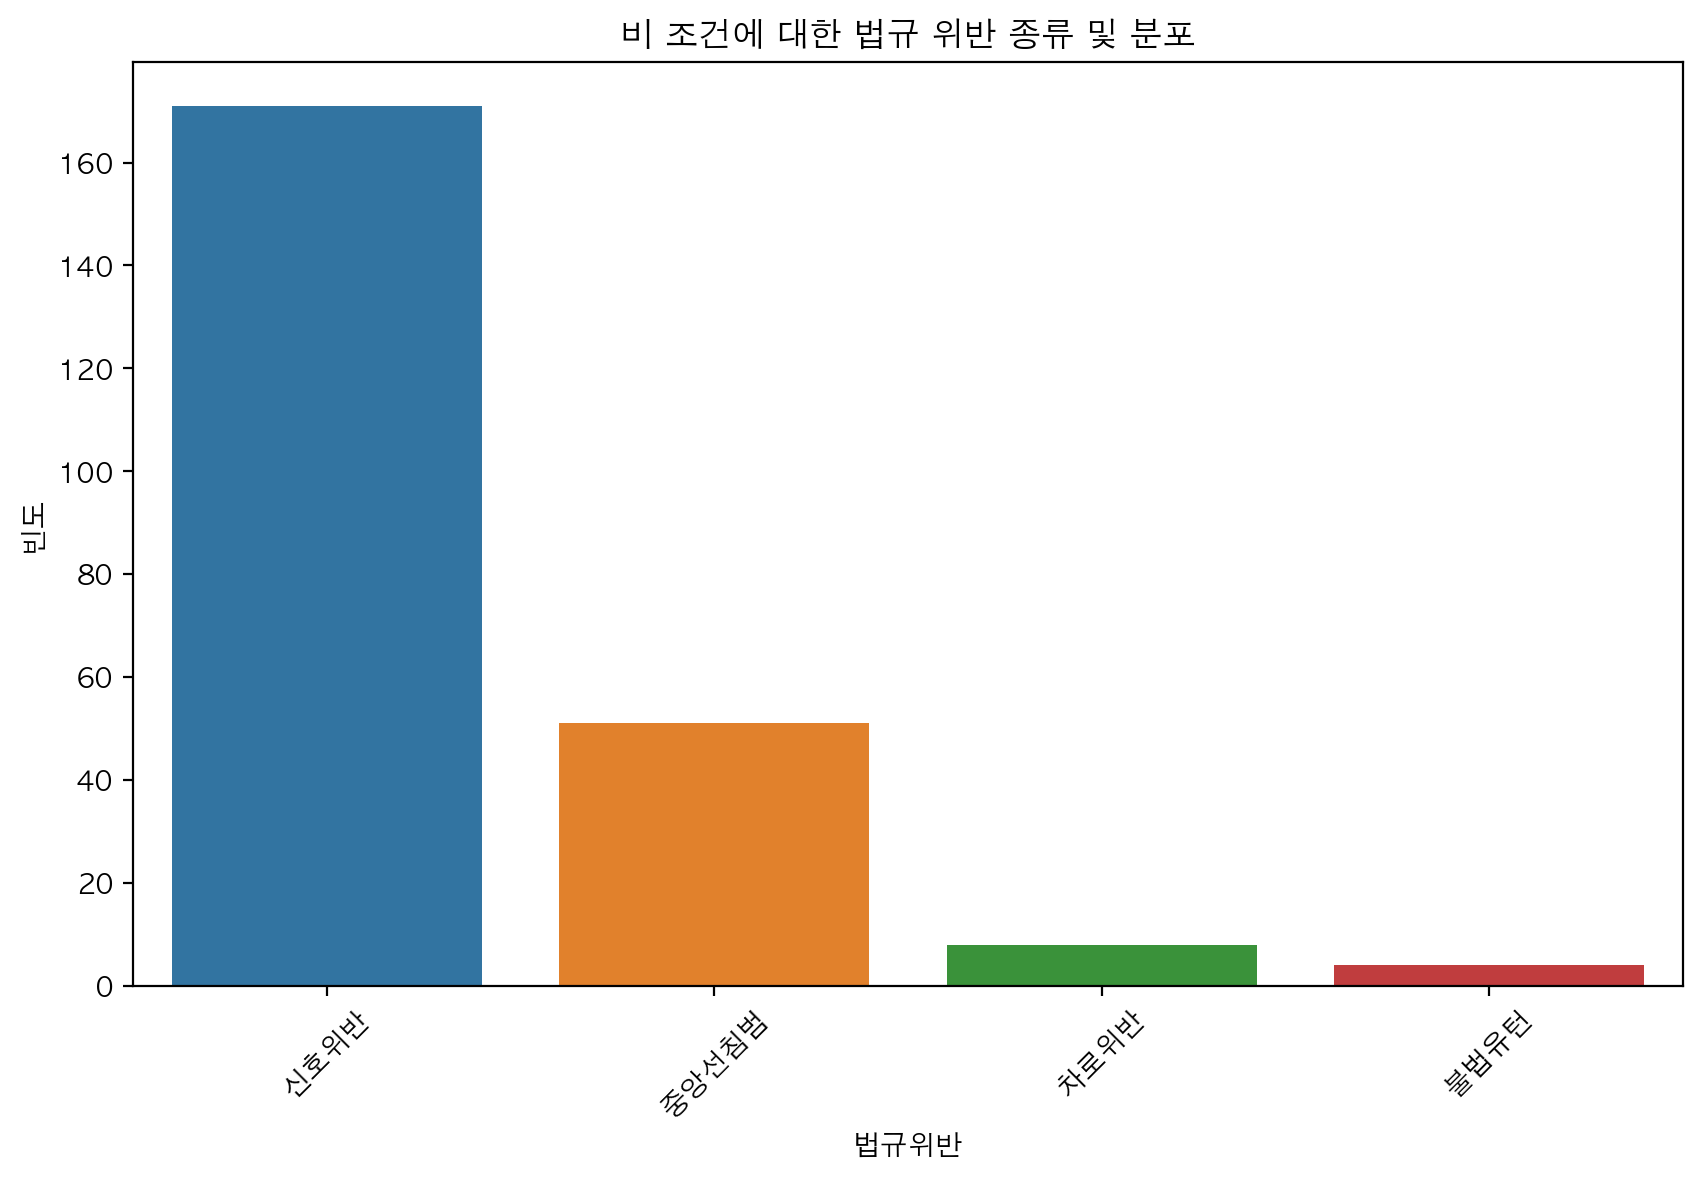

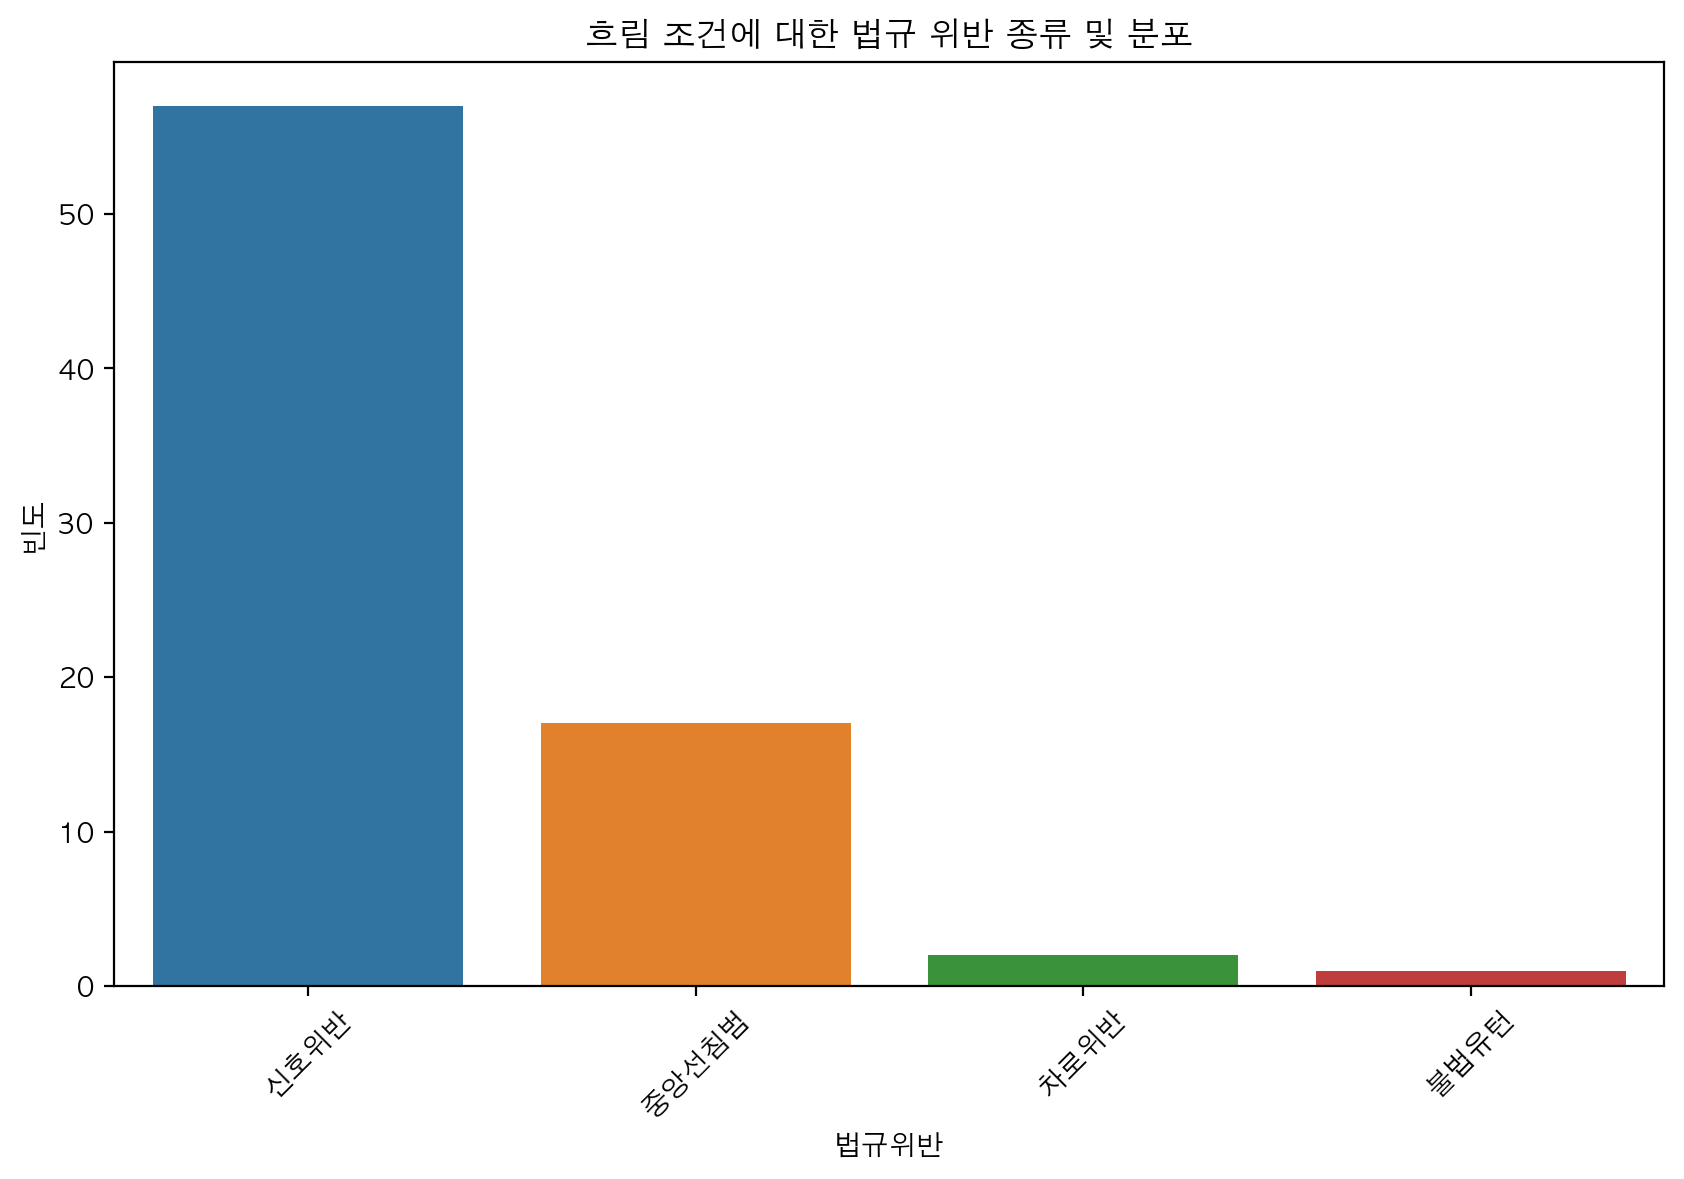

In [124]:
# '비'와 '흐림' 날씨 조건에 대한 법규 위반의 분포
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='기상상태', hue='법규위반', order=['비', '흐림'], hue_order=df['법규위반'].value_counts().index)
plt.title('비와 흐림 날씨 조건에 대한 법규 위반의 분포')
plt.xlabel('기상상태')
plt.ylabel('빈도')
plt.legend(title='법규위반')
plt.show()

# '비' 조건에 대한 법규위반 종류 및 분포
plt.figure(figsize=(10, 6))
sns.countplot(data=df[df['기상상태'] == '비'], x='법규위반', order=df['법규위반'].value_counts().index)
plt.title('비 조건에 대한 법규 위반 종류 및 분포')
plt.xlabel('법규위반')
plt.ylabel('빈도')
plt.xticks(rotation=45)
plt.show()

# '흐림' 조건에 대한 법규위반 종류 및 분포
plt.figure(figsize=(10, 6))
sns.countplot(data=df[df['기상상태'] == '흐림'], x='법규위반', order=df['법규위반'].value_counts().index)
plt.title('흐림 조건에 대한 법규 위반 종류 및 분포')
plt.xlabel('법규위반')
plt.ylabel('빈도')
plt.xticks(rotation=45)
plt.show()


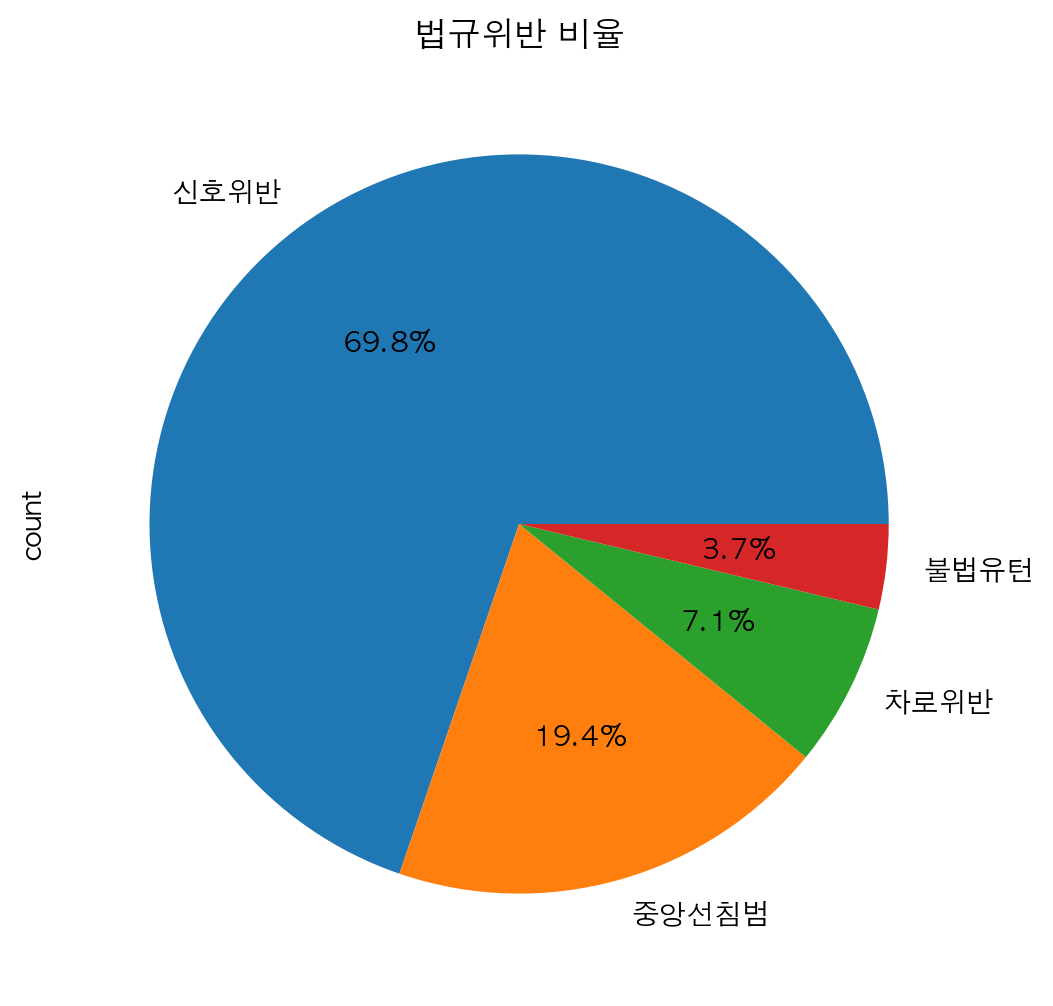

In [97]:
# 3. 원형 차트 (Pie Chart) - 법규위반
plt.figure(figsize=(6, 6))
df['법규위반'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('법규위반 비율')
plt.show()

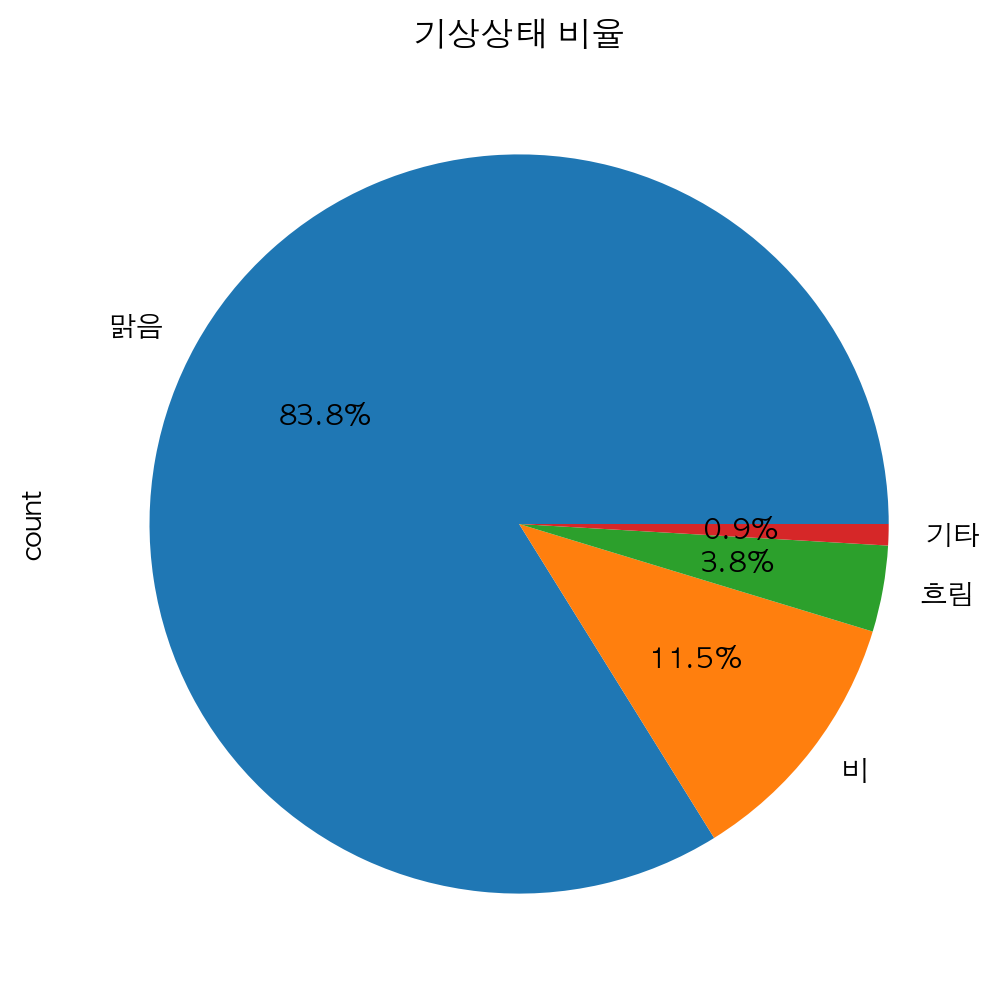

In [98]:
# 4. 원형 차트 (Pie Chart) - 기상상태
plt.figure(figsize=(6, 6))
df['기상상태'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('기상상태 비율')
plt.show()

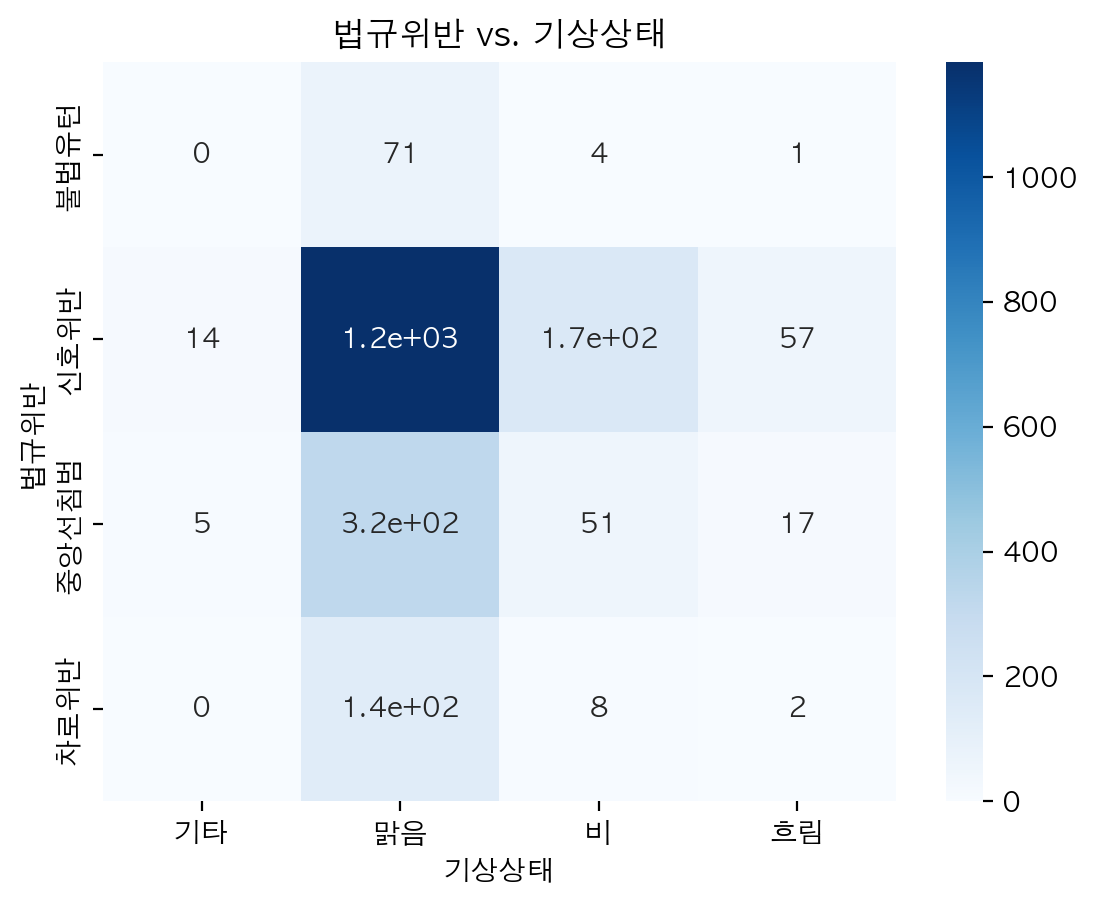

In [99]:
# 5. 교차표 (Cross-Tabulation)
cross_table = pd.crosstab(df['법규위반'], df['기상상태'])
sns.heatmap(cross_table, annot=True, cmap='Blues')
plt.title('법규위반 vs. 기상상태')
plt.show()

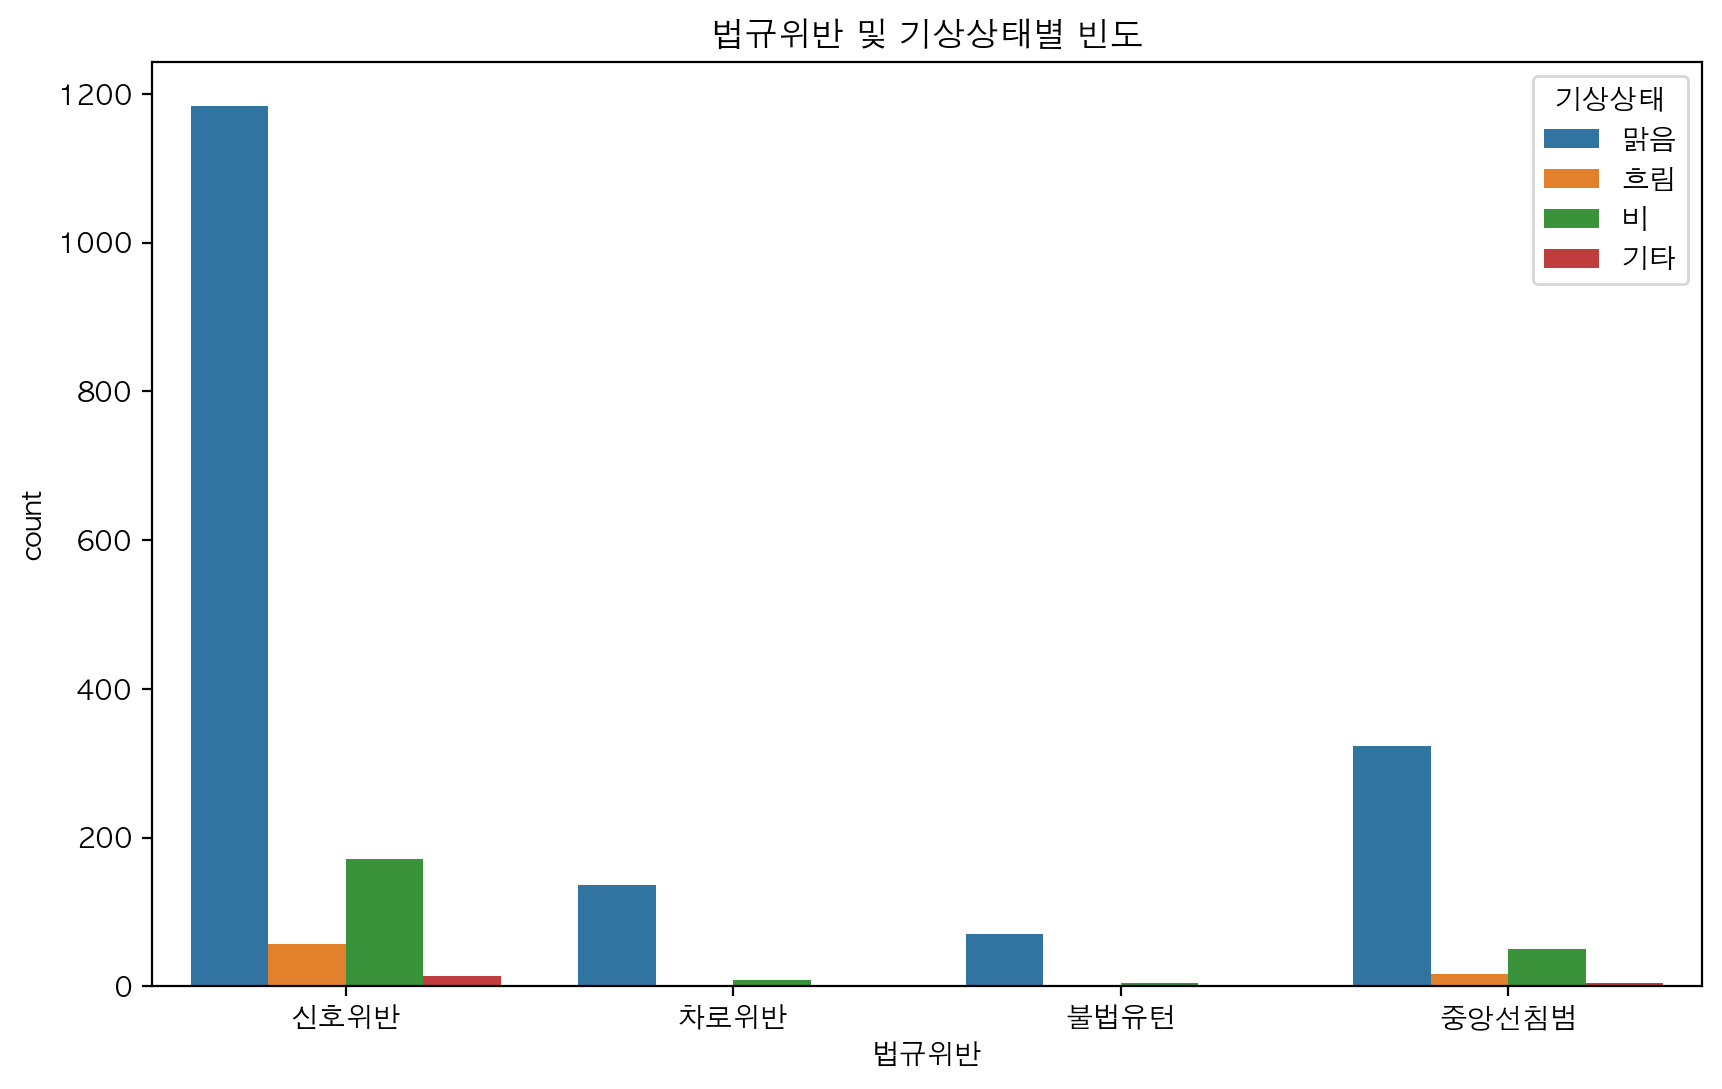

In [100]:
# 다중 막대 그래프
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='법규위반', hue='기상상태')
plt.title('법규위반 및 기상상태별 빈도')
plt.show()

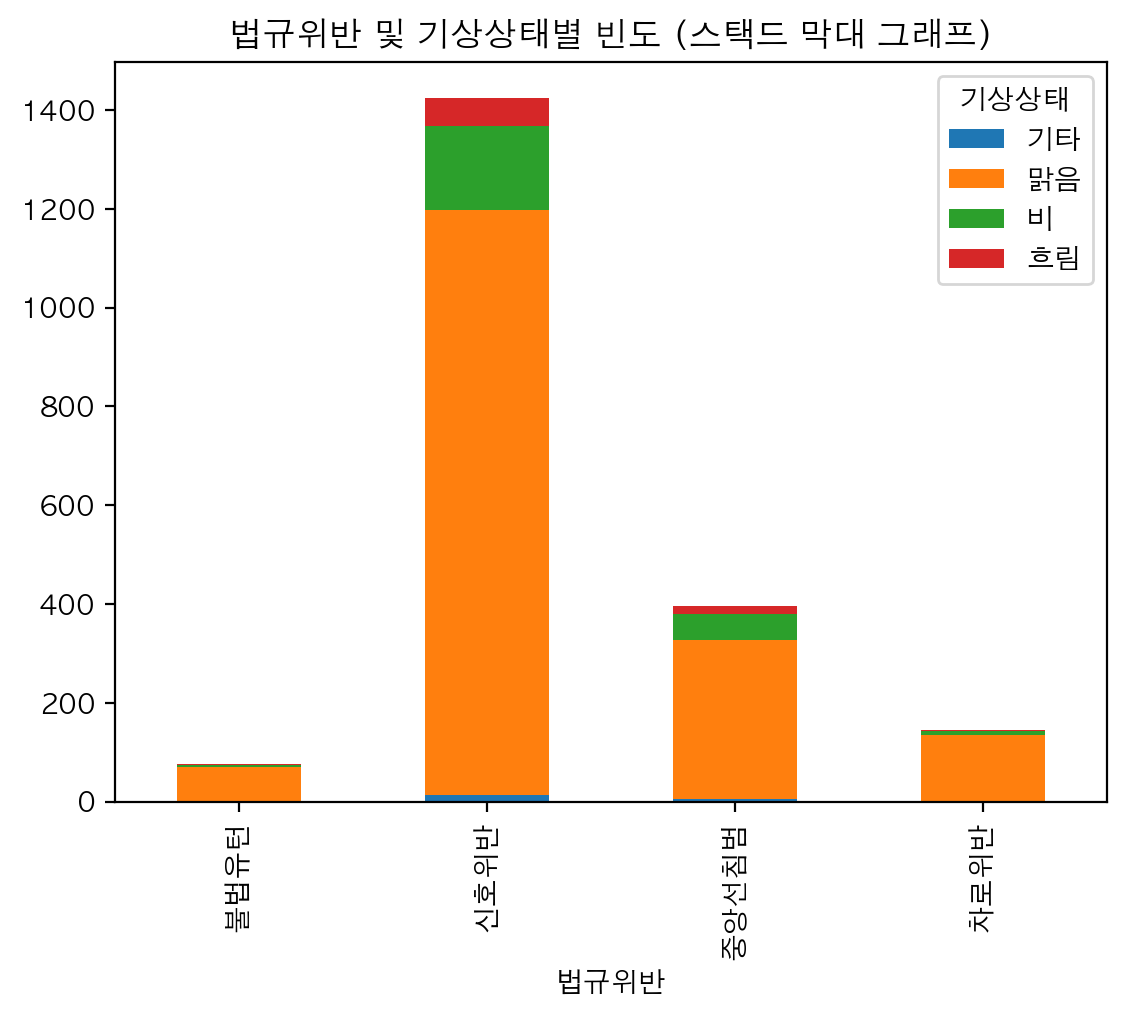

In [101]:
# 스택드 막대 그래프
cross_table = pd.crosstab(df['법규위반'], df['기상상태'])
cross_table.plot(kind='bar', stacked=True)
plt.title('법규위반 및 기상상태별 빈도 (스택드 막대 그래프)')
plt.show()